In [1]:
import copy
import networkx as nx
from tqdm import tqdm
from collections import deque
import matplotlib.pyplot as plt

In [2]:
def readGraphFromFile(filename):
     return nx.read_graphml(filename)

In [3]:
def drawGraph(graph):
    nx.draw(graph, with_labels=True, node_color='skyblue', node_size=400, font_size=10)
    plt.show()

In [4]:
def longestSimplePath2(graph):
  longestPath = []
  totalNodes = len(graph)
  def DFS(visited, node, path = []):
    path = path + [node]
    bestPath = path
    for neighbour in graph[node]:
      if neighbour not in visited:
        visited2 = copy.deepcopy(visited)
        visited2.add(neighbour)
        possibleBestPath = DFS(visited2, neighbour, path)
        if(len(possibleBestPath) > len(bestPath)):
          bestPath = possibleBestPath

    return bestPath


  with tqdm(total=totalNodes) as pbar:
    for node in nx.nodes(graph):
      visited = set([node])
      maxPath = DFS(visited, node)
      if(len(maxPath) > len(longestPath)):
        longestPath = maxPath
      pbar.update()
  return longestPath

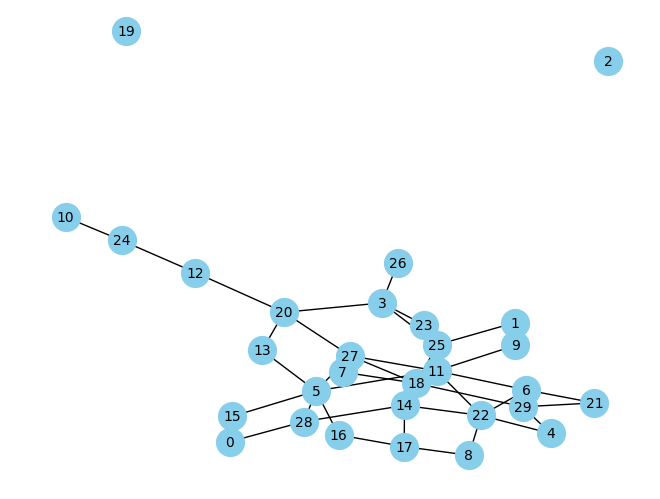

100%|██████████| 30/30 [00:09<00:00,  3.21it/s]

Elements of longest simple path: ['10', '24', '12', '20', '27', '7', '18', '29', '21', '6', '22', '8', '17', '16', '5', '15', '0', '28', '14', '25', '1', '9', '11', '23', '3', '26']
Longest simple path:  26


In [5]:
filename = 'test1.graphml'
printname = 'test1V2.txt'
graph = readGraphFromFile(filename)
drawGraph(graph)
solution = longestSimplePath2(graph)
#print("Graph:", graph)
with open(printname, 'w') as f:
    f.write("Elements of longest simple path:\n")
    f.writelines(str(node) + " " for node in solution)
    f.write("\nLongest simple path length: " + str(len(solution)))

print("Elements of longest simple path:", solution)
print("Longest simple path: ", len(solution))
